# DATAMINING

Import danych

# 1.1. ≈Åadowanie datasetu
Dane zosta≈Çy jebniƒôte z tego datasetu: https://www.cdc.gov/brfss/annual_data/annual_2020.html

zosta≈Çy wcze≈õniej przekonwertowane z formatu sas na csv

In [1]:
import pandas as pd

df = pd.read_csv("../data/brfss2020_clean.csv")

In [2]:
df

_STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0            1       1  1042020       1     4   2020      1100  2020000001   
1            1       1  2072020       2     7   2020      1200  2020000002   
2            1       1  1232020       1    23   2020      1100  2020000003   
3            1       1  1092020       1     9   2020      1100  2020000004   
4            1       1  1042020       1     4   2020      1100  2020000005   
...        ...     ...      ...     ...   ...    ...       ...         ...   
401953      72      11  2192021       2    19   2021      1100  2020004940   
401954      72      11  2142021       2    14   2021      1100  2020004941   
401955      72      11  2142021       2    14   2021      1100  2020004942   
401956      72      11  3172021       3    17   2021      1100  2020004943   
401957      72      11  2182021       2    18   2021      1100  2020004944   

              _PSU  CTELENM1  ...  _RFPSA23  _CLNSCPY  _SGMSCPY  _SGMS10Y  \
0       2020000001       1.0  ...       NaN       1.0       3.0       3.0   
1       2020000002       1.0  ...       NaN       NaN       NaN       NaN   
2       2020000003       1.0  ...       NaN       1.0       3.0       3.0   
3       2020000004       1.0  ...       NaN       NaN       NaN       NaN   
4       2020000005       1.0  ...       NaN       NaN       NaN       NaN   
...            ...       ...  ...       ...       ...       ...       ...   
401953  2020004940       NaN  ...       NaN       NaN       NaN       NaN   
401954  2020004941       NaN  ...       NaN       NaN       NaN       NaN   
401955  2020004942       NaN  ...       NaN       NaN       NaN       NaN   
401956  2020004943       NaN  ...       1.0       1.0       3.0       3.0   
401957  2020004944       NaN  ...       NaN       1.0       3.0       3.0   

        _RFBLDS4  _STOLDNA  _VIRCOLN  _SBONTIM  _CRCREC1  _AIDTST4  
0            3.0       3.0       3.0       3.0       1.0       1.0  
1            NaN       NaN       NaN       2.0       NaN       NaN  
2            3.0       3.0       3.0       3.0       1.0       2.0  
3            NaN       NaN       NaN       NaN       NaN       2.0  
4            NaN       NaN       NaN       NaN       NaN       9.0  
...          ...       ...       ...       ...       ...       ...  
401953       NaN       NaN       NaN       NaN       NaN       1.0  
401954       NaN       NaN       NaN       NaN       NaN       1.0  
401955       NaN       NaN       NaN       NaN       NaN       2.0  
401956       1.0       3.0       3.0       2.0       1.0       1.0  
401957       1.0       3.0       3.0       2.0       1.0       1.0  

[401958 rows x 279 columns]

# 1.2. Inspekcja danych

W tej sekcji przeprowadzono analizƒô danych tabularycznych z okre≈õleniem ich typ√≥w, konwersjƒÖ danych kategorycznych zgodnych z dokumentacjƒÖ i dostosowaniu ich na potrzebƒô eksploracji danych.

Dodatkowo przeprowadzono analizƒô statystycznƒÖ danych oraz ich oczyszczenie.

Funkcja `dataframe_summary` zwraca:
- typy
- liczno≈õƒá
- liczbƒô unikalnych warto≈õci
- liczbƒô brak√≥w
- odsetek brak√≥w
- sko≈õno≈õƒá
- kurtozƒô
- korelacjƒô ze zmiennƒÖ predykcyjnƒÖ (je≈õli podana).

In [3]:
def dataframe_summary(df, pred=None):
    '''
    Zwraca typy, liczno≈õƒá, liczbƒô unikalnych warto≈õci, liczbƒô brak√≥w, odsetek brak√≥w,
    sko≈õno≈õƒá, kurtozƒô oraz korelacjƒô ze zmiennƒÖ celu (je≈õli podana).
    '''
    summary = pd.DataFrame({
        'types': df.dtypes,
        'counts': df.count(),
        'distincts': df.nunique(),
        'nulls': df.isnull().sum(),
        'missing_ratio (%)': (df.isnull().sum() / df.shape[0]) * 100,
        'skewness': df.skew(numeric_only=True),
        'kurtosis': df.kurt(numeric_only=True)
    })

    summary['uniques'] = [df[col].unique() for col in summary.index]

    if pred is not None and pred in df.columns:
        summary[f'corr {pred}'] = df.corr(numeric_only=True)[pred]

    return summary


## Korelacja dla zmiennych predykcyjnych

Dla danych przeprowadzono analizƒô statystycznƒÖ potencjalnych zmiennych 


- `ADDEPEV3` 
    
    Opisuje czy osoba badana kiedykolwiek posiada≈Ça zaburzenia depresyjne (w tym depresjƒô, ciƒô≈ºkƒÖ depresjƒô, dystymiƒô lub lekkƒÖ depresjƒô)

|Warto≈õƒá| Znaczenie                         |
| ----- | --------------------------------- |
| 1     | Tak                             |
| 2     | Nie                             |
| 7     | Nie wiem / Nie jestem pewny(-a) |
| 9     | Odmowa odpowiedzi               |


In [4]:
df["ADDEPEV3"].value_counts()

ADDEPEV3
2.0    324035
1.0     75820
7.0      1476
9.0       621
Name: count, dtype: int64

In [5]:
# Zak≈Çadamy, ≈ºe df to BRFSS 2020 po wczytaniu i wstƒôpnym przetworzeniu
# np. df['ADDEPEV3'] = df['ADDEPEV3'].map({1: 1, 2: 0})

# Wygenerowanie podsumowania wzglƒôdem zmiennej celu
summary_ADDEPEV3 = dataframe_summary(df, pred='ADDEPEV3')

summary_ADDEPEV3

types  counts  distincts   nulls  missing_ratio (%)  skewness  \
_STATE      int64  401958         53       0           0.000000  0.168148   
FMONTH      int64  401958         12       0           0.000000  0.197212   
IDATE       int64  401958        439       0           0.000000  0.054446   
IMONTH      int64  401958         12       0           0.000000  0.054767   
IDAY        int64  401958         31       0           0.000000  0.112475   
...           ...     ...        ...     ...                ...       ...   
_STOLDNA  float64  176357          3  225601          56.125516 -3.709040   
_VIRCOLN  float64  174274          3  227684          56.643729 -5.402121   
_SBONTIM  float64  194217          3  207741          51.682265 -0.299935   
_CRCREC1  float64  175698          3  226260          56.289463  1.424674   
_AIDTST4  float64  367921          3   34037           8.467800  3.559879   

           kurtosis                                            uniques  \
_STATE    -0.637796  [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, ...   
FMONTH    -1.281194            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   
IDATE     -1.268195  [1042020, 2072020, 1232020, 1092020, 1292020, ...   
IMONTH    -1.263340            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   
IDAY      -1.072257  [4, 7, 23, 9, 29, 30, 5, 18, 20, 8, 27, 15, 6,...   
...             ...                                                ...   
_STOLDNA  12.199234                               [3.0, nan, 1.0, 2.0]   
_VIRCOLN  28.241651                               [3.0, nan, 1.0, 2.0]   
_SBONTIM  -1.544532                               [3.0, 2.0, nan, 1.0]   
_CRCREC1   0.233231                               [1.0, nan, 2.0, 3.0]   
_AIDTST4  12.102124                               [1.0, nan, 2.0, 9.0]   

          corr ADDEPEV3  
_STATE        -0.012670  
FMONTH        -0.007086  
IDATE         -0.006642  
IMONTH        -0.006760  
IDAY           0.005227  
...                 ...  
_STOLDNA       0.020666  
_VIRCOLN       0.020754  
_SBONTIM       0.023495  
_CRCREC1       0.030913  
_AIDTST4       0.050939  

[279 rows x 9 columns]

- `MENTHLTH`


Zmierzona liczba dni, w kt√≥rych osoba badana odczuwa≈Ça z≈Çy stan zdrowia psychicznego w ciƒÖgu ostatnich 30 dni. Pytanie uwzglƒôdnia stres, depresjƒô oraz problemy emocjonalne.

| Warto≈õƒá | Znaczenie                            |
| ------- | ------------------------------------ |
| 0‚Äì30  | Liczba dni z≈Çego stanu psychicznego  |
| 88    | Brak z≈Çych dni                   |
| 77    | Nie wiem / Nie jestem pewny(-a)  |
| 99    | Odmowa odpowiedzi                |
| .     | Brak danych / pytanie nie zadane |


In [6]:
df["MENTHLTH"].value_counts()

MENTHLTH
88.0    255707
30.0     22297
2.0      19591
5.0      16705
10.0     12656
3.0      12500
15.0     12006
1.0      11144
20.0      6544
7.0       6524
4.0       6344
77.0      5833
14.0      2475
25.0      2394
99.0      2091
6.0       1794
8.0       1314
12.0       909
28.0       643
21.0       436
29.0       400
18.0       255
9.0        252
16.0       189
27.0       166
17.0       159
13.0       137
22.0       114
11.0       109
24.0        88
23.0        77
26.0        76
19.0        24
Name: count, dtype: int64

In [7]:
summary_MENTHLTH = dataframe_summary(df, pred='MENTHLTH')

summary_MENTHLTH

types  counts  distincts   nulls  missing_ratio (%)  skewness  \
_STATE      int64  401958         53       0           0.000000  0.168148   
FMONTH      int64  401958         12       0           0.000000  0.197212   
IDATE       int64  401958        439       0           0.000000  0.054446   
IMONTH      int64  401958         12       0           0.000000  0.054767   
IDAY        int64  401958         31       0           0.000000  0.112475   
...           ...     ...        ...     ...                ...       ...   
_STOLDNA  float64  176357          3  225601          56.125516 -3.709040   
_VIRCOLN  float64  174274          3  227684          56.643729 -5.402121   
_SBONTIM  float64  194217          3  207741          51.682265 -0.299935   
_CRCREC1  float64  175698          3  226260          56.289463  1.424674   
_AIDTST4  float64  367921          3   34037           8.467800  3.559879   

           kurtosis                                            uniques  \
_STATE    -0.637796  [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, ...   
FMONTH    -1.281194            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   
IDATE     -1.268195  [1042020, 2072020, 1232020, 1092020, 1292020, ...   
IMONTH    -1.263340            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   
IDAY      -1.072257  [4, 7, 23, 9, 29, 30, 5, 18, 20, 8, 27, 15, 6,...   
...             ...                                                ...   
_STOLDNA  12.199234                               [3.0, nan, 1.0, 2.0]   
_VIRCOLN  28.241651                               [3.0, nan, 1.0, 2.0]   
_SBONTIM  -1.544532                               [3.0, 2.0, nan, 1.0]   
_CRCREC1   0.233231                               [1.0, nan, 2.0, 3.0]   
_AIDTST4  12.102124                               [1.0, nan, 2.0, 9.0]   

          corr MENTHLTH  
_STATE         0.010233  
FMONTH        -0.026440  
IDATE         -0.028757  
IMONTH        -0.028769  
IDAY           0.002050  
...                 ...  
_STOLDNA       0.013283  
_VIRCOLN       0.007037  
_SBONTIM       0.007470  
_CRCREC1       0.003890  
_AIDTST4       0.041737  

[279 rows x 9 columns]

# 1.3. Data cleaning

In [8]:
# additional drop columns
to_drop = [
    "IDATE",
    "DISPCODE",
    "SEQNO",
    "_PSU",
    "_STSTR",
    "_STRWT",
    "_WT2RAKE",
    "_LLCPWT2",
    "_LLCPWT",
]
df = df.drop(columns=to_drop)

Czyszczenie zmiennej `ADDEPEV3` (czy kiedykolwiek zdiagnozowano depresjƒô)

Mapa warto≈õci:


1 = Tak ‚Üí 1


2 = Nie ‚Üí 0


7, 9 = brak danych

In [9]:
df = df[df['ADDEPEV3'].isin([1, 2])].copy()


**Czyszczenie zmiennej MENTHLTH (liczba dni z≈Çego stanu psychicznego)**



Warto≈õci 77, 99, NaN ‚Üí brak danych


Warto≈õƒá 88 = 0 dni (czyli brak z≈Çego samopoczucia)

In [10]:
df['MENTHLTH'] = df['MENTHLTH'].replace({77: pd.NA, 99: pd.NA, 88: 0})
df['MENTHLTH'] = pd.to_numeric(df['MENTHLTH'], errors='coerce')

**Klasyfikacja zmiennych na heurystykach z dokumentacji BRFS**

Kategoryzacja kloumn + czyszczenie + encoding + skalowanie + usuwanie


In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def classify_variables(df):
    binary_vars, nominal_vars, ordinal_vars, continuous_vars, to_drop = [], [], [], [], []

    for col in df.columns:
        if col == 'MENTHLTH':
            continue
        
        vals = set(df[col].dropna().unique())
        nunique = len(vals)
        missing_ratio = df[col].isna().mean()

        if nunique <= 1 or missing_ratio > 0.5:
            to_drop.append(col)
        elif vals.issubset({1, 2, 7, 8, 9}):
            binary_vars.append(col)
        elif nunique <= 15 and pd.api.types.is_integer_dtype(df[col]):
            ordinal_vars.append(col)
        elif nunique <= 15:
            nominal_vars.append(col)
        else:
            continuous_vars.append(col)

    return {
        'binary': binary_vars,
        'ordinal': ordinal_vars,
        'nominal': nominal_vars,
        'continuous': continuous_vars,
        'drop': to_drop
    }

def preprocess_brfss(df):
    df = df.copy()
    
    # Klasyfikacja zmiennych
    classified = classify_variables(df)

    # 1. Usu≈Ñ kolumny zbyt ubogie lub zbyt brakujƒÖce
    df.drop(columns=classified['drop'], inplace=True, errors='ignore')

    # 2. Binarne zmienne: 7/8/9 ‚Üí NaN, 1‚Üí1, 2‚Üí0
    for col in classified['binary']:
        df[col] = df[col].replace({7: pd.NA, 8: pd.NA, 9: pd.NA})
        df[col] = df[col].map({1: 1, 2: 0})

    # 3. PorzƒÖdkowe: 7/8/9 ‚Üí NaN (mo≈ºna zostawiƒá jako liczby)
    for col in classified['ordinal']:
        df[col] = df[col].replace({7: pd.NA, 8: pd.NA, 9: pd.NA})

    # 4. Nominalne: one-hot encoding
    df = pd.get_dummies(df, columns=classified['nominal'], drop_first=True)

    # # 5. CiƒÖg≈Çe: standaryzacja
    # scaler = StandardScaler()
    # continuous_cols = classified['continuous']
    # df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

    return df, classified


In [12]:
df_cleaned, variable_map = preprocess_brfss(df)
df_cleaned

_STATE FMONTH IMONTH  IDAY  IYEAR  CELLSEX  PVTRESD3  CSTATE1  \
0            1      1      1     4   2020      NaN       NaN      NaN   
1            1      1      2     7   2020      NaN       NaN      NaN   
2            1      1      1    23   2020      NaN       NaN      NaN   
3            1      1      1     9   2020      NaN       NaN      NaN   
4            1      1      1     4   2020      NaN       NaN      NaN   
...        ...    ...    ...   ...    ...      ...       ...      ...   
401953      72     11      2    19   2021      0.0       1.0      1.0   
401954      72     11      2    14   2021      0.0       1.0      1.0   
401955      72     11      2    14   2021      0.0       1.0      1.0   
401956      72     11      3    17   2021      1.0       1.0      1.0   
401957      72     11      2    18   2021      0.0       1.0      1.0   

        LANDLINE  HHADULT  ...  _RACEPRV_2.0  _RACEPRV_3.0  _RACEPRV_4.0  \
0            NaN      NaN  ...         False         False         False   
1            NaN      NaN  ...          True         False         False   
2            NaN      NaN  ...          True         False         False   
3            NaN      NaN  ...         False         False         False   
4            NaN      NaN  ...         False         False         False   
...          ...      ...  ...           ...           ...           ...   
401953       0.0      4.0  ...         False         False         False   
401954       0.0      2.0  ...         False         False         False   
401955       0.0      2.0  ...         False         False         False   
401956       1.0      2.0  ...         False         False         False   
401957       0.0      2.0  ...         False         False         False   

        _RACEPRV_5.0  _RACEPRV_6.0  _RACEPRV_7.0  _RACEPRV_8.0  _BMI5CAT_2.0  \
0              False         False         False         False         False   
1              False         False         False         False         False   
2              False         False         False         False         False   
3              False         False         False         False         False   
4              False         False         False         False          True   
...              ...           ...           ...           ...           ...   
401953         False         False         False          True          True   
401954         False         False         False          True         False   
401955         False         False         False          True         False   
401956         False         False         False          True         False   
401957         False         False         False          True         False   

        _BMI5CAT_3.0  _BMI5CAT_4.0  
0              False         False  
1               True         False  
2              False         False  
3              False         False  
4              False         False  
...              ...           ...  
401953         False         False  
401954         False          True  
401955         False          True  
401956          True         False  
401957         False          True  

[399855 rows x 245 columns]

In [23]:
classified = classify_variables(df)

print("Binarne:", classified['binary'])
print("PorzƒÖdkowe:", classified['ordinal'])
print("Nominalne:", classified['nominal'])
print("CiƒÖg≈Çe:", classified['continuous'])
print("Do usuniƒôcia:", classified['drop'])

Binarne: []
PorzƒÖdkowe: ['FMONTH', 'IMONTH', 'IYEAR', 'SEXVAR', 'ADDEPEV3', 'QSTVER', 'QSTLANG', '_IMPRACE', '_PHYS14D', '_MENT14D', '_ASTHMS1', '_SEX', '_AGEG5YR', '_AGE65YR', '_AGE_G', '_CHLDCNT', '_EDUCAG', '_INCOMG', '_SMOKER3']
Nominalne: ['CELLSEX', 'PVTRESD3', 'CSTATE1', 'LANDLINE', 'GENHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'HAVARTH4', 'CHCKDNY2', 'DIABETE4', 'LASTDEN4', 'RMVTETH4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1', 'INCOME2', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'FLUSHOT7', 'SHINGLE2', 'PNEUVAC4', 'SEATBELT', 'HADMAM', 'HADPAP2', 'COLNSCPY', 'SIGMSCPY', 'BLDSTOL1', 'STOOLDNA', 'VIRCOLON', 'HIVTST7', 'HIVRISK5', 'PDIABTST', 'PREDIAB1', 'ECIGARET', 'TRNSGNDR', '_METSTAT', '_URBSTAT', '_RAWRAKE', '_RFHLTH', '_HCVU651', '_TOTINDA', '_MICHD', '_LTASTH1', '_CASTHM1', '_DRDXAR2', '_EXTETH3', '_

Usuniƒôcie danych z pustymi kolumnami (usuniƒôcie kolumn gdzie liczba rekord√≥w stanowi mniej ni≈º 95% pr√≥by)

In [15]:
# Ustawienie brak√≥w
df['MENTHLTH'] = df['MENTHLTH'].replace({77: pd.NA, 99: pd.NA})
total_menthlth_count = df['MENTHLTH'].notna().sum()

# Progi procentowe
min_total_ratio = 0.05      # 5% pr√≥by
min_total = int((1 - min_total_ratio) * total_menthlth_count)

# Potencjalne zmienne kategoryczne
exclude_cols = ['MENTHLTH']
categorical_cols = [
    col for col in df.columns 
    if col not in exclude_cols and df[col].nunique(dropna=True) <= 15
]


# 1.4. Data visualistion

## Checking outliers

In [16]:
df_plot = df.copy()
df_plot = df_plot.sort_values(by='SEXVAR')
men = df_plot['SEXVAR'].isin([1])
df_plot[men]


_STATE  FMONTH  IMONTH  IDAY  IYEAR  CTELENM1  PVTRESD1  COLGHOUS  \
401956      72      11       3    17   2021       NaN       NaN       NaN   
401952      72      11       2    21   2021       NaN       NaN       NaN   
401951      72      11       2    15   2021       NaN       NaN       NaN   
401947      72      11       3    16   2021       NaN       NaN       NaN   
401945      72      11       3     9   2021       NaN       NaN       NaN   
...        ...     ...     ...   ...    ...       ...       ...       ...   
38           1       2       2    14   2020       1.0       1.0       NaN   
36           1       2       3     8   2020       1.0       1.0       NaN   
34           1       2       3     1   2020       1.0       1.0       NaN   
30           1       2       2     5   2020       1.0       1.0       NaN   
5            1       1       1     9   2020       1.0       1.0       NaN   

        STATERE1  CELPHONE  ...  _RFPSA23  _CLNSCPY  _SGMSCPY  _SGMS10Y  \
401956       NaN       NaN  ...       1.0       1.0       3.0       3.0   
401952       NaN       NaN  ...       NaN       NaN       NaN       NaN   
401951       NaN       NaN  ...       1.0       NaN       NaN       NaN   
401947       NaN       NaN  ...       NaN       NaN       NaN       NaN   
401945       NaN       NaN  ...       0.0       1.0       1.0       1.0   
...          ...       ...  ...       ...       ...       ...       ...   
38           1.0       2.0  ...       1.0       1.0       3.0       3.0   
36           1.0       2.0  ...       NaN       NaN       NaN       NaN   
34           1.0       2.0  ...       NaN       NaN       NaN       NaN   
30           1.0       2.0  ...       0.0       NaN       NaN       NaN   
5            1.0       2.0  ...       0.0       1.0       3.0       3.0   

        _RFBLDS4  _STOLDNA  _VIRCOLN  _SBONTIM  _CRCREC1  _AIDTST4  
401956       1.0       3.0       3.0       2.0       1.0       1.0  
401952       NaN       NaN       NaN       NaN       NaN       1.0  
401951       1.0       3.0       NaN       2.0       1.0       1.0  
401947       NaN       NaN       NaN       NaN       NaN       1.0  
401945       3.0       1.0       1.0       2.0       1.0       1.0  
...          ...       ...       ...       ...       ...       ...  
38           2.0       3.0       3.0       2.0       1.0       0.0  
36           NaN       NaN       NaN       2.0       NaN       NaN  
34           NaN       NaN       NaN       2.0       NaN       NaN  
30           NaN       NaN       NaN       NaN       NaN       1.0  
5            3.0       3.0       3.0       3.0       1.0       1.0  

[182923 rows x 270 columns]

C:\Users\adamw\AppData\Local\Temp\ipykernel_23648\556993186.py:31: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\adamw\miniforge3\envs\ai\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


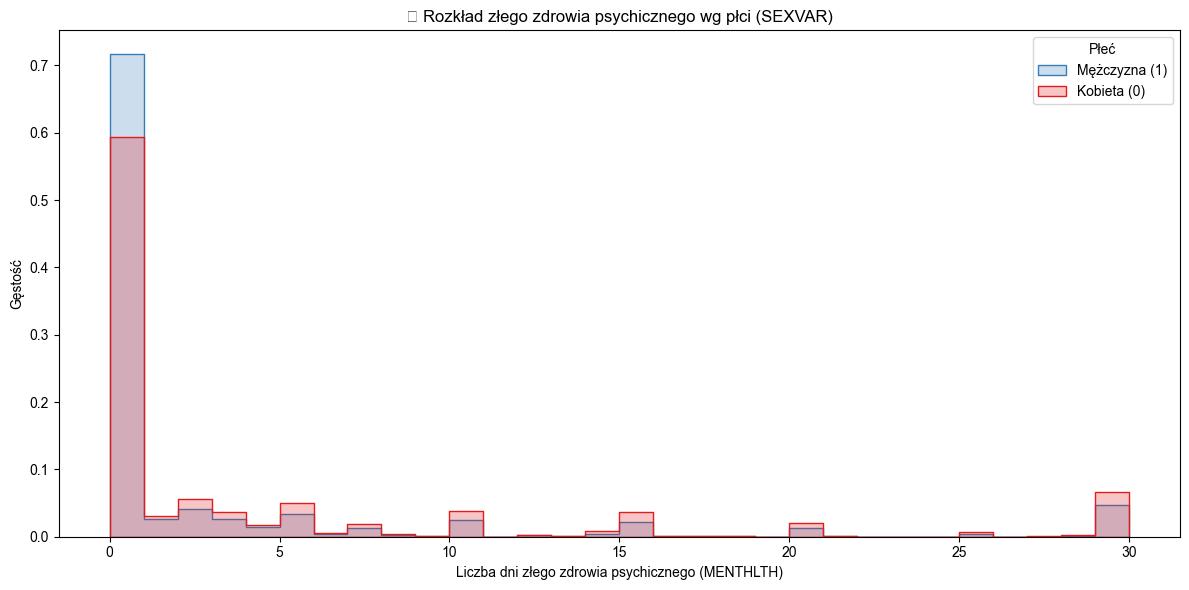

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Zak≈Çadamy, ≈ºe zmienne sƒÖ ju≈º oczyszczone (MENTHLTH numeryczna, bez 77/99/NaN)
df_plot = df.copy()
df_plot = df_plot.sort_values(by='MENTHLTH')


# Przygotowanie danych: usuniƒôcie brak√≥w
df_plot = df[['MENTHLTH', 'SEXVAR']].dropna()

# Histogram: rozk≈Çad liczby dni z≈Çego samopoczucia wg p≈Çci
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_plot,
    x="MENTHLTH",
    hue="SEXVAR",
    bins=30,
    element="step",
    stat="density",
    common_norm=False,
    palette="Set1"
)

# O≈õ X i legenda
plt.xlabel("Liczba dni z≈Çego zdrowia psychicznego (MENTHLTH)")
plt.ylabel("Gƒôsto≈õƒá")
plt.title("üîç Rozk≈Çad z≈Çego zdrowia psychicznego wg p≈Çci (SEXVAR)")
plt.legend(title="P≈Çeƒá", labels=["Mƒô≈ºczyzna (1)", "Kobieta (0)"])
sns.set_style("whitegrid")
plt.tight_layout()
plt.show()



<Axes: xlabel='EDUCA', ylabel='MENTHLTH'>

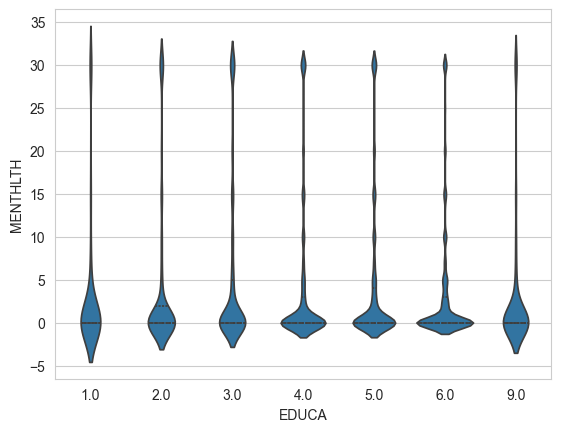

In [18]:
df_plot = df[['MENTHLTH', 'EDUCA']].dropna()
sns.violinplot(data=df_plot, x='EDUCA', y='MENTHLTH', inner='quartile')

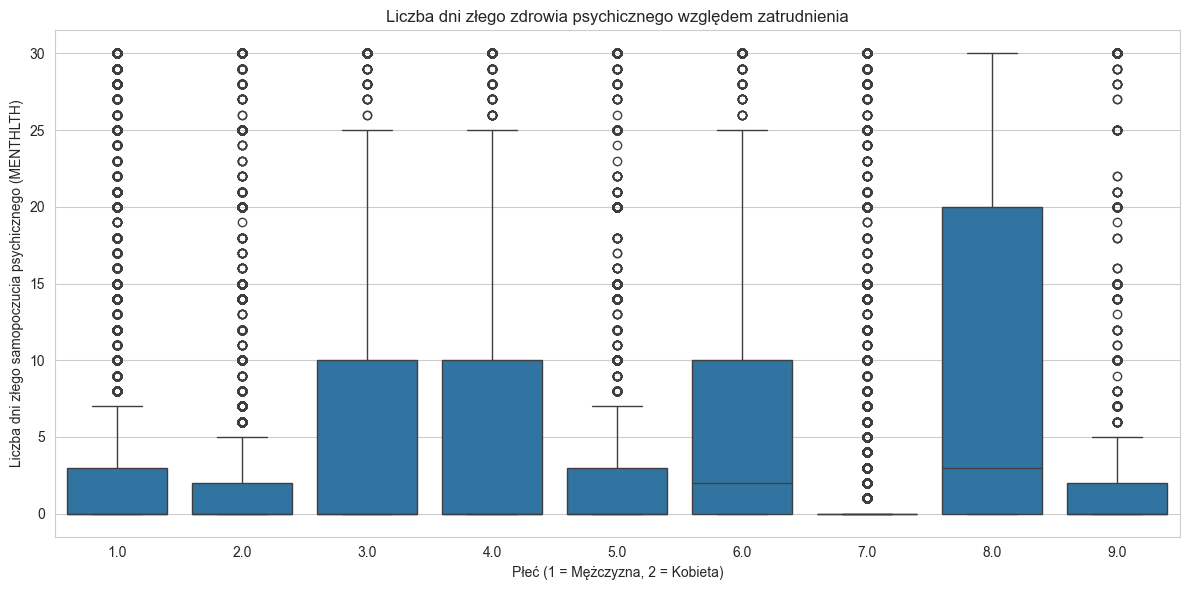

In [19]:
df_plot = df[['EMPLOY1', 'MENTHLTH']].dropna(subset=['EMPLOY1', 'MENTHLTH'])
plt.figure(figsize=(12, 6))
sns.boxplot(x='EMPLOY1', y='MENTHLTH', data=df_plot)

plt.title('Liczba dni z≈Çego zdrowia psychicznego wzglƒôdem zatrudnienia')
plt.xlabel('P≈Çeƒá (1 = Mƒô≈ºczyzna, 2 = Kobieta)')
plt.ylabel('Liczba dni z≈Çego samopoczucia psychicznego (MENTHLTH)')
sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

# 2. Selekcja zmiennych

# 2.1. Analiza ANOVA
ANOVA to test statystyczny u≈ºywany do sprawdzenia, czy wystƒôpujƒÖ istotne r√≥≈ºnice miƒôdzy ≈õrednimi trzech lub wiƒôcej grup, tj. analiza wariancji. Pomaga nam ustaliƒá, czy zmiany w danych sƒÖ spowodowane r√≥≈ºnymi czynnikami (zdrowie, edukacja, itp).


Jest dobrym narzƒôdziem do oceny zwiƒÖzku miƒôdzy:

- zmiennƒÖ zale≈ºnƒÖ (predykcyjnƒÖ) ‚Äì czyli tym, co pr√≥bujesz przewidzieƒá (output, target), 
- a zmiennƒÖ niezale≈ºnƒÖ (wej≈õciowƒÖ) ‚Äì czyli cechami wej≈õciowymi (input features, explanatory variables). 

In [20]:
from scipy.stats import f_oneway

# Upewnij siƒô, ≈ºe brakujƒÖce warto≈õci sƒÖ poprawnie ustawione
df['MENTHLTH'] = df['MENTHLTH'].replace({77: pd.NA, 99: pd.NA})

# Lista zmiennych kandydujƒÖcych: niskie zr√≥≈ºnicowanie ‚Üí kategoryczne
exclude_cols = ['MENTHLTH']
categorical_cols = [
    col for col in df.columns 
    if col not in exclude_cols and df[col].nunique(dropna=True) <= 15
]

# Wyniki ANOVA
anova_results = []

for col in categorical_cols:
    try:
        data = df[[col, 'MENTHLTH']].dropna()
        groups = [grp['MENTHLTH'] for _, grp in data.groupby(col)]
        if len(groups) > 1:
            f_stat, p_val = f_oneway(*groups)
            anova_results.append({
                'Variable': col,
                'F-statistic': round(f_stat, 4),
                'p-value': round(p_val, 6),
                'N groups': len(groups)
            })
    except Exception as e:
        continue  # Pomija zmienne, kt√≥re powodujƒÖ b≈ÇƒÖd (np. same NaN)

# Posortuj wyniki po istotno≈õci
anova_df = pd.DataFrame(anova_results).sort_values(by='p-value')
significant_features = anova_df[anova_df['p-value'] < 0.05]['Variable'].tolist()
significant_features

['FMONTH',
 'IMONTH',
 'NUMADULT',
 'LANDSEX',
 'CELLSEX',
 'RESPSLCT',
 'NUMWOMEN',
 'NUMMEN',
 'PVTRESD3',
 'LANDLINE',
 'SEXVAR',
 'CHECKUP1',
 'MEDCOST',
 'PERSDOC2',
 'HLTHPLN1',
 'GENHLTH',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'EXERANY2',
 'CVDINFR4',
 'CVDCRHD4',
 'HAVARTH4',
 'CHCCOPD2',
 'ADDEPEV3',
 'MARITAL',
 'RMVTETH4',
 'LASTDEN4',
 'DIABETE4',
 'CHCKDNY2',
 'USENOW3',
 'FLUSHOT7',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'EDUCA',
 'RENTHOM1',
 'CPDEMO1B',
 'DEAF',
 'VETERAN3',
 'EMPLOY1',
 'INCOME2',
 'BLIND',
 'PREGNANT',
 'DIFFWALK',
 'DECIDE',
 'SEATBELT',
 'HADMAM',
 'SHINGLE2',
 'PNEUVAC4',
 'HOWLONG',
 'SMOKDAY2',
 'STOPSMK2',
 'LASTSMK2',
 'HADPAP2',
 'PSATEST1',
 'PCPSADI1',
 'PCPSARE1',
 'PCPSAAD3',
 'HADHYST2',
 'HPVTEST',
 'LASTPAP2',
 'CSRVPAIN',
 'CSRVDEIN',
 'CSRVCTL2',
 'CSRVINSR',
 'LCSCTSCN',
 'RSNMRJN1',
 'ECIGNOW',
 'PSATIME',
 'SIGMTEST',
 'PCPSARS1',
 'COLNSCPY',
 'COLNTEST',
 'LSTBLDS4',
 'HIVRISK5',
 'VIRCOLON',
 'STOOLDNA

In [21]:
from scipy.stats import f_oneway

# Automatyczna identyfikacja potencjalnych kolumn kategorycznych
cat_cols = df.select_dtypes(include=['object', 'category']).columns

anova_results = {}
for col in cat_cols:
    try:
        groups = []
        for val in df[col].dropna().unique():
            group = df[df[col] == val]["MENTHLTH"].dropna()
            if len(group) > 1:
                groups.append(group)

        if len(groups) > 1:
            stat, p = f_oneway(*groups)
            anova_results[col] = p
    except Exception as e:
        print(f"B≈ÇƒÖd dla kolumny {col}: {e}")
        continue

# Wy≈õwietl posortowane wyniki p-value
sorted_anova = sorted(anova_results.items(), key=lambda x: x[1])
significant_features = [k for k, v in sorted_anova if v < 0.05]

print("Istotne zmienne kategoryczne wzglƒôdem MENTHLTH:")
for feature in significant_features:
    print(f"{feature}: p = {anova_results[feature]:.5f}")


Istotne zmienne kategoryczne wzglƒôdem MENTHLTH:
